# Part I.I - Obtain App Info Data

In [122]:
## Import necessary libraries

# retrieves app info from App Store
from itunes_app_scraper.scraper import AppStoreScraper
# retrieves reviews from App Store
from app_store_scraper import AppStore

# retrieves app info AND reviews from Google Play
from google_play_scraper import app, Sort, reviews, reviews_all

# pretty print data structures
from pprint import pprint

# for storing in MongoDB
import pymongo
from pymongo import MongoClient

import datetime as dt
from tzlocal import get_localzone

import random
import time

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [93]:
## Read in file containing app details, 
  ## need the app IDs for scraping stores
app_df = pd.read_csv('Data/mha_app_info.csv')
app_df.head()

,app_name,iOS,iOS_revs,iOS_app_name,iOS_app_id,android,android_revs,android_appID
0,Aloe Bud,1,3000,aloe-bud,1318382054,0,0,NaN
1,Aura,1,22100,aura-meditation-sleep,1114223104,1,10400,com.aurahealth
2,BetterHelp,1,32400,betterhelp-online-counseling,995252384,1,15300,com.betterhelp
3,Breathe2Relax,1,200,breathe2relax,425720246,1,1100,org.t2health.breathe2relax
4,Calm,1,1200000,calm,571800810,1,352500,com.calm.android


In [94]:
## Store list of app ids to loop through for both stores
app_store_ids = list(app_df['iOS_app_id'])
google_play_ids = list(app_df['android_appID'].dropna())

In [95]:
## Check number of apps found in App Store
len(app_store_ids)

56

In [96]:
## Only 47 of the total 56 are also available for Android
len(google_play_ids)

47

## Set Up MongoDB for Project

In [ ]:
## Set up Mongo client
client = MongoClient(host='localhost', port=27017)

In [ ]:
## Set up new database for project
mha_proj_db = client['mha_proj_db']

## Scrape General Info about Each App
### Scrape App Info from App Store

In [44]:
## Set up App Store Scraper
scraper = AppStoreScraper()
app_store_list = list(scraper.get_multiple_app_details(app_store_ids))
pprint(app_store_list)

https://itunes.apple.com/lookup?id=1318382054&country=nl&entity=software
https://itunes.apple.com/lookup?id=1114223104&country=nl&entity=software
https://itunes.apple.com/lookup?id=995252384&country=nl&entity=software
https://itunes.apple.com/lookup?id=425720246&country=nl&entity=software
https://itunes.apple.com/lookup?id=571800810&country=nl&entity=software
https://itunes.apple.com/lookup?id=1010391170&country=nl&entity=software
https://itunes.apple.com/lookup?id=1452264969&country=nl&entity=software
https://itunes.apple.com/lookup?id=1184456130&country=nl&entity=software
https://itunes.apple.com/lookup?id=1318726049&country=nl&entity=software
https://itunes.apple.com/lookup?id=1203637303&country=nl&entity=software
https://itunes.apple.com/lookup?id=1140486359&country=nl&entity=software
https://itunes.apple.com/lookup?id=1489604281&country=nl&entity=software
https://itunes.apple.com/lookup?id=1300107718&country=nl&entity=software
https://itunes.apple.com/lookup?id=515118602&country=n

  'primaryGenreName': 'Medical',
  'releaseDate': '2016-12-05T20:53:02Z',
  'releaseNotes': '- New game: light up a candle to highlight a supportive '
                  'thought\n'
                  '- New journey: Anxiety\n'
                  '- New journey: Perfectionism\n'
                  '- Bug fixes, improved personalisation and user journey '
                  'tweaks',
  'screenshotUrls': 'https://is2-ssl.mzstatic.com/image/thumb/Purple114/v4/4e/75/b0/4e75b0da-be39-89f8-4bd3-9c5b0c04c9ac/f731993f-e88f-438e-9393-b01c6b803619_Slice_8-ocd.png/392x696bb.png,https://is4-ssl.mzstatic.com/image/thumb/Purple114/v4/18/8d/5f/188d5f16-148f-2e66-3f39-450a5cf4650d/e05b7c71-d4a7-409d-94be-d2edb0fc1a5f_Slice_9-ocd.png/392x696bb.png,https://is4-ssl.mzstatic.com/image/thumb/Purple124/v4/9d/d6/e8/9dd6e8a8-950c-fb5e-3409-00757984f40b/ef7d65a7-0463-4433-b710-20e6363c2bf6_Slice_10-ocd.png/392x696bb.png,https://is5-ssl.mzstatic.com/image/thumb/Purple124/v4/d5/a1/75/d5a175eb-630f-ceef-43dd-1eb3aae75

                 '\n'
                 'THE POWER OF LISTENING:\n'
                 'We believe anyone can be present for another, so Listeners '
                 'are everyday people from all walks of life. They’ve been '
                 'where you are and understand the power of listening and '
                 'being heard. Download the app and become a Listener to help '
                 'others and train your empathetic skillset.\n'
                 '\n'
                 'CONFIDENTIAL, SAFE, AND ANONYMOUS:\n'
                 'Safety is important for authentic sharing, so HearMe never '
                 'shares your chats or personal information. You can share '
                 'your hopes, dreams, disappointments and secrets with the '
                 'confidence that nothing you say goes beyond the chat.',
  'features': '',
  'fileSizeBytes': '29085696',
  'formattedPrice': 'Gratis',
  'genreIds': '6013,6012',
  'genres': 'Gezondheid en fitness,Lifestyle',
  'ipadScreenshotUr

                 '- Personalize your treatment plan\n'
                 '- Do “face-to-face” ERP therapy online through live video '
                 'sessions\n'
                 '\n'
                 'Support between each session:\n'
                 '- Use OCD therapeutic tools 24/7\n'
                 '- Message your therapist anytime\n'
                 '- Learn what helps other people from a peer community\n'
                 '\n'
                 'WHAT IS OCD?\n'
                 '\n'
                 'OCD is a common psychiatric disorder that involves '
                 'repetitive, unwanted thoughts and compulsive behaviors '
                 'intended to reduce the anxiety caused by those thoughts. '
                 'Commonly misunderstood as an annoying personality quirk, OCD '
                 'usually involves intense distress and can become completely '
                 'debilitating.\n'
                 '\n'
                 'IS NOCD THERAPY EFFECTIVE?\n'
              

                 '\n'
                 'if you don’t choose to purchase stoic premium, you can still '
                 'use stoic for free.',
  'features': 'iosUniversal',
  'fileSizeBytes': '61028352',
  'formattedPrice': 'Gratis',
  'genreIds': '6013,6012',
  'genres': 'Gezondheid en fitness,Lifestyle',
  'ipadScreenshotUrls': 'https://is1-ssl.mzstatic.com/image/thumb/Purple114/v4/be/06/fc/be06fc5f-0fa7-a367-395b-f8d8c07cdfa7/pr_source.jpg/576x768bb.jpg,https://is3-ssl.mzstatic.com/image/thumb/Purple124/v4/f0/02/f9/f002f9c0-a0cd-52b6-04d6-d17dacbb30e8/faa3e015-d341-4322-b7ae-a5cf46940438_ipad_3_en.jpg/576x768bb.jpg,https://is1-ssl.mzstatic.com/image/thumb/Purple124/v4/38/4d/d5/384dd552-853e-1f22-d24b-03b0eb77b67b/5dd82f4b-55e3-4c2d-8c1a-bc1e5288d27e_ipad_2_en.jpg/576x768bb.jpg,https://is5-ssl.mzstatic.com/image/thumb/Purple114/v4/04/bf/f1/04bff1ed-0b9b-8178-fdce-68805dd44543/pr_source.jpg/576x768bb.jpg,https://is2-ssl.mzstatic.com/image/thumb/Purple124/v4/d7/dd/ba/d7ddbabc-78ca-9686

  'isGameCenterEnabled': False,
  'isVppDeviceBasedLicensingEnabled': True,
  'kind': 'software',
  'languageCodesISO2A': 'EN',
  'minimumOsVersion': '11.0',
  'price': 0.0,
  'primaryGenreId': 6020,
  'primaryGenreName': 'Medical',
  'releaseDate': '2016-03-22T20:47:26Z',
  'releaseNotes': 'Thanks for using Youper! This update contains some bug '
                  'fixes and performance improvements. \n'
                  '\n'
                  'Youper 9 brings a new experience for helping you increase '
                  'happiness, lower stress, and beat anxiety and depression '
                  'using quick therapy exercises.',
  'screenshotUrls': 'https://is4-ssl.mzstatic.com/image/thumb/PurpleSource114/v4/64/ea/bd/64eabd83-c69c-9e95-f69b-d813e3d8e291/cff2c3f9-315b-417e-953b-07e00e7afde5_9.00.100_-_Store_Images_iPhone_-_Working-001.jpg/392x696bb.jpg,https://is5-ssl.mzstatic.com/image/thumb/PurpleSource114/v4/30/6b/f4/306bf4d7-5b50-91b6-f9f1-c43674f606f5/0280e0e5-3335-4c1f-bc76-79

In [27]:
## Successfully got data for all 56 apps in App Store
len(app_store_list)

56

In [33]:
## Print results obtained for first app: Aloe Bud
pprint(app_store_list[0])

{'advisories': '',
 'appletvScreenshotUrls': '',
 'artistId': 1170681391,
 'artistName': 'Aloebud LLC',
 'artistViewUrl': 'https://apps.apple.com/nl/developer/aloebud-llc/id1170681391?uo=4',
 'artworkUrl100': 'https://is4-ssl.mzstatic.com/image/thumb/Purple123/v4/3f/88/01/3f880181-259a-a8b0-54db-3c8cecd48f9f/source/100x100bb.jpg',
 'artworkUrl512': 'https://is4-ssl.mzstatic.com/image/thumb/Purple123/v4/3f/88/01/3f880181-259a-a8b0-54db-3c8cecd48f9f/source/512x512bb.jpg',
 'artworkUrl60': 'https://is4-ssl.mzstatic.com/image/thumb/Purple123/v4/3f/88/01/3f880181-259a-a8b0-54db-3c8cecd48f9f/source/60x60bb.jpg',
 'averageUserRating': 4.61538,
 'averageUserRatingForCurrentVersion': 4.61538,
 'bundleId': 'club.aloe.Aloe',
 'contentAdvisoryRating': '4+',
 'currency': 'EUR',
 'currentVersionReleaseDate': '2020-06-25T21:20:25Z',
 'description': 'Aloe Bud is your all-in-one, self-care pocket companion. We '
                'gently bring awareness to self-care activities, using '
                'e

In [169]:
## Print results obtained for first app: Aloe Bud
pprint(app_store_list[0])

{'_id': ObjectId('604f829ebd1e5fa3b2830644'),
 'advisories': '',
 'appletvScreenshotUrls': '',
 'artistId': 1170681391,
 'artistName': 'Aloebud LLC',
 'artistViewUrl': 'https://apps.apple.com/nl/developer/aloebud-llc/id1170681391?uo=4',
 'artworkUrl100': 'https://is4-ssl.mzstatic.com/image/thumb/Purple123/v4/3f/88/01/3f880181-259a-a8b0-54db-3c8cecd48f9f/source/100x100bb.jpg',
 'artworkUrl512': 'https://is4-ssl.mzstatic.com/image/thumb/Purple123/v4/3f/88/01/3f880181-259a-a8b0-54db-3c8cecd48f9f/source/512x512bb.jpg',
 'artworkUrl60': 'https://is4-ssl.mzstatic.com/image/thumb/Purple123/v4/3f/88/01/3f880181-259a-a8b0-54db-3c8cecd48f9f/source/60x60bb.jpg',
 'averageUserRating': 4.61538,
 'averageUserRatingForCurrentVersion': 4.61538,
 'bundleId': 'club.aloe.Aloe',
 'contentAdvisoryRating': '4+',
 'currency': 'EUR',
 'currentVersionReleaseDate': '2020-06-25T21:20:25Z',
 'description': 'Aloe Bud is your all-in-one, self-care pocket companion. We '
                'gently bring awareness to se

In [168]:
## Print results obtained for fifth app: Calm
pprint(app_store_list[4])

{'_id': ObjectId('604f829ebd1e5fa3b2830648'),
 'advisories': '',
 'appletvScreenshotUrls': '',
 'artistId': 571800813,
 'artistName': 'Calm.com',
 'artistViewUrl': 'https://apps.apple.com/nl/developer/calm-com/id571800813?uo=4',
 'artworkUrl100': 'https://is4-ssl.mzstatic.com/image/thumb/Purple124/v4/1b/ff/0b/1bff0b01-1f90-db78-dece-29895c5f6b8a/source/100x100bb.jpg',
 'artworkUrl512': 'https://is4-ssl.mzstatic.com/image/thumb/Purple124/v4/1b/ff/0b/1bff0b01-1f90-db78-dece-29895c5f6b8a/source/512x512bb.jpg',
 'artworkUrl60': 'https://is4-ssl.mzstatic.com/image/thumb/Purple124/v4/1b/ff/0b/1bff0b01-1f90-db78-dece-29895c5f6b8a/source/60x60bb.jpg',
 'averageUserRating': 4.59591,
 'averageUserRatingForCurrentVersion': 4.59591,
 'bundleId': 'com.calm.calmapp',
 'contentAdvisoryRating': '4+',
 'currency': 'EUR',
 'currentVersionReleaseDate': '2021-03-04T17:26:44Z',
 'description': '** Best of 2018 Award Winner ** — Apple\n'
                '\n'
                '** 2017 App of the Year ** — App

#### Store Scraped App Store Data in New MongoDB Collection

In [37]:
## Set up new collection within project db
app_store_info = mha_proj_db['app_store_info']

## Insert app details into app_store_info collection
app_store_info.insert_many(app_store_list)

In [46]:
## Check that the new db for the project exists
  ## (lazily created upon insertion of data into a collection)
list(client.list_databases())

[{'name': 'admin', 'sizeOnDisk': 40960.0, 'empty': False},
 {'name': 'config', 'sizeOnDisk': 73728.0, 'empty': False},
 {'name': 'local', 'sizeOnDisk': 40960.0, 'empty': False},
 {'name': 'mha_proj_db', 'sizeOnDisk': 8192.0, 'empty': False},
 {'name': 'new_db', 'sizeOnDisk': 40960.0, 'empty': False}]

In [49]:
# Turns query (here, basically SELECT *) into a list and creates df from that list of dicts
app_store_info_df = pd.DataFrame(list(app_store_info.find({})))
app_store_info_df

,_id,screenshotUrls,ipadScreenshotUrls,appletvScreenshotUrls,artworkUrl60,artworkUrl512,artworkUrl100,artistViewUrl,supportedDevices,advisories,...,currency,version,wrapperType,artistId,artistName,genres,price,description,bundleId,userRatingCount
0,604f829ebd1e5fa3b2830644,https://is2-ssl.mzstatic.com/image/thumb/Purpl...,https://is3-ssl.mzstatic.com/image/thumb/Purpl...,,https://is4-ssl.mzstatic.com/image/thumb/Purpl...,https://is4-ssl.mzstatic.com/image/thumb/Purpl...,https://is4-ssl.mzstatic.com/image/thumb/Purpl...,https://apps.apple.com/nl/developer/aloebud-ll...,"iPhone5s-iPhone5s,iPadAir-iPadAir,iPadAirCellu...",,...,EUR,1.1,software,1170681391,Aloebud LLC,"Gezondheid en fitness,Lifestyle",0.00,"Aloe Bud is your all-in-one, self-care pocket ...",club.aloe.Aloe,52
1,604f829ebd1e5fa3b2830645,https://is5-ssl.mzstatic.com/image/thumb/Purpl...,https://is3-ssl.mzstatic.com/image/thumb/Purpl...,,https://is1-ssl.mzstatic.com/image/thumb/Purpl...,https://is1-ssl.mzstatic.com/image/thumb/Purpl...,https://is1-ssl.mzstatic.com/image/thumb/Purpl...,https://apps.apple.com/nl/developer/aura-healt...,"iPad2Wifi-iPad2Wifi,iPad23G-iPad23G,iPhone4S-i...",,...,EUR,3.11.4,software,1042329742,Aura Health Inc.,"Gezondheid en fitness,Lifestyle",0.00,"** As loved by Apple (Best of 2017, #1 New App...",com.AuraMobile,223
2,604f829ebd1e5fa3b2830646,https://is4-ssl.mzstatic.com/image/thumb/Purpl...,https://is3-ssl.mzstatic.com/image/thumb/Purpl...,,https://is3-ssl.mzstatic.com/image/thumb/Purpl...,https://is3-ssl.mzstatic.com/image/thumb/Purpl...,https://is3-ssl.mzstatic.com/image/thumb/Purpl...,https://apps.apple.com/nl/developer/betterhelp...,"iPhone5s-iPhone5s,iPadAir-iPadAir,iPadAirCellu...",Soms/Milde medische/behandelingsinformatie,...,EUR,9.9,software,995252383,BetterHelp,"Gezondheid en fitness,Lifestyle",0.00,BetterHelp is the convenient way to get profes...,com.ionicframework.betterhelp369708,41
3,604f829ebd1e5fa3b2830647,https://is2-ssl.mzstatic.com/image/thumb/Purpl...,https://is4-ssl.mzstatic.com/image/thumb/Purpl...,,https://is1-ssl.mzstatic.com/image/thumb/Purpl...,https://is1-ssl.mzstatic.com/image/thumb/Purpl...,https://is1-ssl.mzstatic.com/image/thumb/Purpl...,https://apps.apple.com/nl/developer/national-c...,"iPad2Wifi-iPad2Wifi,iPad23G-iPad23G,iPhone4S-i...",,...,EUR,1.7.7,software,499648345,National Center for Telehealth & Technology,"Gezondheid en fitness,Geneeskunde",0.00,Breathe2Relax is a portable stress management ...,org.t2health.BreatheTwoRelax,5
4,604f829ebd1e5fa3b2830648,https://is2-ssl.mzstatic.com/image/thumb/Purpl...,https://is4-ssl.mzstatic.com/image/thumb/Purpl...,,https://is4-ssl.mzstatic.com/image/thumb/Purpl...,https://is4-ssl.mzstatic.com/image/thumb/Purpl...,https://is4-ssl.mzstatic.com/image/thumb/Purpl...,https://apps.apple.com/nl/developer/calm-com/i...,"iPhone5s-iPhone5s,iPadAir-iPadAir,iPadAirCellu...",,...,EUR,5.13,software,571800813,Calm.com,"Gezondheid en fitness,Lifestyle",0.00,** Best of 2018 Award Winner ** — Apple\n\n** ...,com.calm.calmapp,13309
5,604f829ebd1e5fa3b2830649,https://is4-ssl.mzstatic.com/image/thumb/Purpl...,https://is4-ssl.mzstatic.com/image/thumb/Purpl...,,https://is4-ssl.mzstatic.com/image/thumb/Purpl...,https://is4-ssl.mzstatic.com/image/thumb/Purpl...,https://is4-ssl.mzstatic.com/image/thumb/Purpl...,https://apps.apple.com/nl/developer/inquiry-he...,"iPhone5s-iPhone5s,iPadAir-iPadAir,iPadAirCellu...",Soms/Milde medische/behandelingsinformatie,...,EUR,5.1.2,software,1003891578,Inquiry Health LLC,"Geneeskunde,Gezondheid en fitness",0.00,"""This app is the single greatest tool to help ...",com.moodtools.thoughtdiary,13
6,604f829ebd1e5fa3b283064a,https://is5-ssl.mzstatic.com/image/thumb/Purpl...,https://is2-ssl.mzstatic.com/image/thumb/Purpl...,,https://is2-ssl.mzstatic.com/image/thumb/Purpl...,https://is2-ssl.mzstatic.com/image/thumb/Purpl...,https://is2-ssl.mzstatic.com/image/thumb/Purpl...,https://apps.apple.com/nl/developer/swasth-inc...,"iPad2Wifi-iPad2Wifi,iPad23G-iPad23G,iPho

In [50]:
## Check columns of new df
app_store_info_df.columns

Index(['_id', 'screenshotUrls', 'ipadScreenshotUrls', 'appletvScreenshotUrls',
       'artworkUrl60', 'artworkUrl512', 'artworkUrl100', 'artistViewUrl',
       'supportedDevices', 'advisories', 'isGameCenterEnabled', 'kind',
       'features', 'minimumOsVersion', 'trackCensoredName',
       'languageCodesISO2A', 'fileSizeBytes', 'sellerUrl', 'formattedPrice',
       'contentAdvisoryRating', 'averageUserRatingForCurrentVersion',
       'userRatingCountForCurrentVersion', 'averageUserRating', 'trackViewUrl',
       'trackContentRating', 'trackId', 'trackName', 'sellerName',
       'releaseDate', 'currentVersionReleaseDate', 'releaseNotes',
       'primaryGenreName', 'genreIds', 'isVppDeviceBasedLicensingEnabled',
       'primaryGenreId', 'currency', 'version', 'wrapperType', 'artistId',
       'artistName', 'genres', 'price', 'description', 'bundleId',
       'userRatingCount'],
      dtype='object')

In [166]:
app_store_info_df['description'][4]

"** Best of 2018 Award Winner ** — Apple\n\n** 2017 App of the Year ** — Apple\n\n** Happiest App in the World ** — Center for Humane Technology\n\nCalm is the #1 app for Sleep, Meditation and Relaxation. Join the millions experiencing better sleep, lower stress, and less anxiety with our guided meditations, Sleep Stories, breathing programs, stretching exercises, and relaxing music. Calm is recommended by top psychologists, therapists, and mental health experts.\n\nCalm is the perfect mindfulness app for beginners, but also includes hundreds of programs for intermediate and advanced users. Guided meditation sessions are available in lengths of 3, 5, 10, 15, 20 or 25 minutes so you can choose the perfect length to fit with your schedule. \n\nSleep Stories are bedtime stories that are guaranteed to lull you into a deep and restful slumber. Calm has 100+ exclusive Sleep Stories for adults and children alike, featuring well-known talent such as Stephen Fry, Matthew McConaughey, Leona Lewi

### Scrape App Info from Google Play

In [51]:
## Set up loop to get similar app data from Google Play
google_play_list = []

for i in google_play_ids:
    info = app(i)
    del info['comments']
    google_play_list.append(info)

pprint(google_play_list)

[{'adSupported': None,
  'androidVersion': '4.1',
  'androidVersionText': '4.1 and up',
  'appId': 'com.aurahealth',
  'containsAds': False,
  'contentRating': 'Everyone',
  'contentRatingDescription': None,
  'currency': 'USD',
  'description': '<b>Find peace everyday with Aura</b> - discover thousands of '
                 'meditations to relieve stress, anxiety, improve sleep, relax '
                 'and more - personalized just for you.\r\n'
                 '\r\n'
                 'Featured on: Forbes, The Oprah Magazine, The New York Times, '
                 'Women’s & Men’s Health, and more!\r\n'
                 '\r\n'
                 'Aura is the ultimate & personalized meditation and '
                 'mindfulness app. With Aura, you have unlimited access to '
                 'meditations (guided and unguided), life coaching, and '
                 'stories from top coaches and therapists around the world.\r\n'
                 '\r\n'
                 'Here are a few re

                     'SESSIONS<br> <br>Take your fitness &amp; workout routine '
                     'to the next level by trying our integrated exercise '
                     'sessions. We’ll coach you through each of our sessions '
                     'and more!<br> <br>★ 7-minute scientific workout to '
                     'improve your fitness so you can lose weight<br>★ Zen and '
                     'vipassana meditation for high anxiety and '
                     'mindfulness<br>★ Deep work and power nap sessions for '
                     'productivity and focus<br>★ Stretching starter pack for '
                     'total flexibility  <br>★ Yoga exercises to reduce '
                     'anxiety and improve your mental health<br> <br>After '
                     'you’ve created your morning routine, you’ll begin to '
                     'receive personalized vocal advice from your own personal '
                     'life coach based on your everyday habits.<br> <br>▌HO

                     'from a high happiness quotient, then you&#39;re given '
                     'games and activities that will boost your mood, like '
                     'Uplift, Serenity Scene, and Gratitude '
                     'Walk.&quot;<br><br>YOU KNOW YOUR GOALS. WE KNOW HOW YOU '
                     'CAN ACHIEVE THEM.<br><br>Choose one track. Choose them '
                     'all.<br><br>* Conquering negative thoughts<br>* Coping '
                     'better with stress<br>* Building self-confidence<br>* '
                     'Fueling your career success<br>* Achieving mindfulness '
                     'through meditation<br>* …and 30+ more!<br><br>Happify is '
                     'free to download and use. It’s a great way to get '
                     'started, and discover why so many people upgrade to '
                     'Happify Plus for access to even more:<br><br>* Unlimited '
                     'access to 30+ tracks;<br>* Your 20-page character '
  

                     'psychologists and teachers from Stanford, Harvard, the '
                     'University of Oxford and more. Music tracks from '
                     'world-renowned artists. Join millions learning to '
                     'meditate on Insight Timer to help calm the mind, reduce '
                     'anxiety, manage stress, and sleep deeply.<br><br>With '
                     '100+ new free guided meditations and sleep tracks added '
                     'daily, more meditation is practiced on Insight Timer '
                     'than anywhere else. Great for both beginners and '
                     'experienced practitioners.<br><br>FREE '
                     'FEATURES:<br><br>* 75,000+  guided meditations<br>* '
                     'Select by time for short meditations when on the go, '
                     'helping you to build a simple daily habit<br>* Thousands '
                     'of music tracks and ambient sounds to calm the mind, '
            

                   '* Bug fixes and performance enhancements',
  'recentChangesHTML': '3.4.2<br>* Fixed a bug that affected saving edits to '
                       'the safety plan on some devices.<br><br>3.4.1<br>* New '
                       'feature: A self-guided safety plan for suicide '
                       'prevention is now available from the lateral menu. The '
                       'safety plan form adheres to the US Department of '
                       'Veterans Affairs format.<br>* Bug fixes and '
                       'performance enhancements',
  'released': 'Aug 15, 2016',
  'reviews': 357,
  'sale': False,
  'saleText': None,
  'saleTime': None,
  'score': 4.42,
  'screenshots': ['https://play-lh.googleusercontent.com/NDeIHkp1aCbCjlknyDE3c1cZ5MLL19Hk0VSVAU4e-lxOY5wL3jwiv6Wk1OImyCkh09RZ',
                  'https://play-lh.googleusercontent.com/iy6escxdjfIdS66MZDCDIk9qFGNoEAWveWxDc4bwtIeSFXjJsIFx6hBicpdT6lM4WA',
                  'https://play-lh.googleuserconten

                     'power-ups, battle bad guys, and complete quests each '
                     'day<br>• Build and track four types of resilience<br>• '
                     'Join the SuperBetter Official Community '
                     'Group<br><br>Live Gamefully.',
  'developer': 'SuperBetter, LLC',
  'developerAddress': 'SuperBetter, LLC\n'
                      '222 Merchandise Mart Plaza\n'
                      'Suite 1230\n'
                      'Chicago, IL 60654',
  'developerEmail': 'superbetter4android@gmail.com',
  'developerId': 'SuperBetter,+LLC',
  'developerInternalID': '7120790324019678616',
  'developerWebsite': 'http://www.superbetter.com',
  'editorsChoice': False,
  'free': True,
  'genre': 'Health & Fitness',
  'genreId': 'HEALTH_AND_FITNESS',
  'headerImage': 'https://play-lh.googleusercontent.com/HXGIzJgv3kg8RsduTypQugvIrHtHgE2baX_6129eDHQL2rshTrd-NVhxxLTEAZYU_FGh',
  'histogram': [298, 218, 268, 1064, 4328],
  'icon': 'https://play-lh.googleusercontent.co

  'recentChangesHTML': '- Get to the right ✅ tools and techniques 🛠faster than '
                       'ever before, with the all new 🎀 Wysa design<br>- '
                       'Direct access to 🆘, and related resources. Please note '
                       'this is not a crisis app.<br>- Scroll ⬆ through the '
                       'suggestion feed, to discover what Wysa thinks you may '
                       'find interesting🤔. <br>- Directly manage notifications '
                       '🔔 via settings ⚙<br>- Convenient access to manage '
                       'subscription 🗓 via settings ⚙',
  'released': 'Oct 6, 2016',
  'reviews': 11551,
  'sale': False,
  'saleText': None,
  'saleTime': None,
  'score': 4.7359285,
  'screenshots': ['https://play-lh.googleusercontent.com/vNoHVmTfE387jNVpIKJ4oF7n3aRUVUIDKFFEI6XcDf3q6dj-Fz-Myn5c-OzVze_o5Cc',
                  'https://play-lh.googleusercontent.com/T8snvAD4i-377lW0XUOd4OCfY8IL49xDfxikaY2UZlGa-fySGcKr2MNmp338My0RYtA0',
         

In [120]:
## Successfully got data for all 47 apps in Google Play
len(google_play_list)

47

In [172]:
pprint(google_play_list[8])

{'_id': ObjectId('604f89f0bd1e5fa3b2830684'),
 'adSupported': None,
 'androidVersion': '5.0',
 'androidVersionText': '5.0 and up',
 'appId': 'co.thefabulous.app',
 'containsAds': False,
 'contentRating': 'Everyone',
 'contentRatingDescription': None,
 'currency': 'USD',
 'description': "▌ Winner of Google's Material Design Award for Most Charming "
                'Engagement\r\n'
                ' \r\n'
                '▌ Nominated for Google Play’s Best App Award\r\n'
                ' \r\n'
                '▌ Incubated at Duke University Behavioral Economics Lab\r\n'
                ' \r\n'
                'Fabulous is not just your average habit tracker! We’re a '
                'science-based app that will motivate you to improve your '
                'fitness & achieve your weight loss goals, reboot your sleep '
                'cycle, and discover mindfulness to reduce your anxiety. '
                'You’ll learn to build a transformative morning routine and '
               

#### Store Scraped App Data in New MongoDB Collection

In [53]:
## Set up new collection within project db
google_play_info = mha_proj_db['google_play_info']

## Insert app details into google_play_info collection
google_play_info.insert_many(google_play_list)

In [54]:
# Turns query (here, basically SELECT *) into a list and creates df from that list of dicts
google_play_info_df = pd.DataFrame(list(google_play_info.find({})))
google_play_info_df

,_id,title,description,descriptionHTML,summary,summaryHTML,installs,minInstalls,score,ratings,...,adSupported,containsAds,released,updated,version,recentChanges,recentChangesHTML,editorsChoice,appId,url
0,604f89f0bd1e5fa3b283067c,"Aura: Meditations, Sleep & Mindfulness",<b>Find peace everyday with Aura</b> - discove...,<b>Find peace everyday with Aura</b> - discove...,1000s of Meditations from world's best coaches...,1000s of Meditations from world&#39;s best coa...,"1,000,000+",1000000,4.589744,10506,...,None,False,"Mar 21, 2017",1605694888,2.4.2,None,None,False,com.aurahealth,https://play.google.com/store/apps/details?id=...
1,604f89f0bd1e5fa3b283067d,BetterHelp: Online Counseling & Therapy,BetterHelp is the convenient way to get profes...,BetterHelp is the convenient way to get profes...,"Get counseling from a licensed therapist, mana...","Get counseling from a licensed therapist, mana...","1,000,000+",1000000,4.395229,15451,...,None,False,"Nov 17, 2014",1613500318,1.64,Thank you for using BetterHelp! We are constan...,Thank you for using BetterHelp! We are constan...,False,com.betterhelp,https://play.google.com/store/apps/details?id=...
2,604f89f0bd1e5fa3b283067e,Breathe2Relax,Breathe2Relax is a portable stress management ...,Breathe2Relax is a portable stress management ...,Breathe2Relax is a stress management tool to h...,Breathe2Relax is a stress management tool to h...,"100,000+",100000,3.236364,1106,...,None,False,"Oct 24, 2011",1610041510,4.0.0,App has been migrated to our Defense Health Ag...,App has been migrated to our Defense Health Ag...,False,org.t2health.breathe2relax,https://play.google.com/store/apps/details?id=...
3,604f89f0bd1e5fa3b283067f,"Calm - Meditate, Sleep, Relax",Calm is a leading app for meditation and sleep...,Calm is a leading app for meditation and sleep...,Join the millions discovering the life-changin...,Join the millions discovering the life-changin...,"10,000,000+",10000000,4.013984,357984,...,None,False,"Jul 30, 2014",1615619475,Varies with device,Thanks for using Calm! This update contains mu...,Thanks for using Calm! This update contains mu...,True,com.calm.android,https://play.google.com/store/apps/details?id=...
4,604f89f0bd1e5fa3b2830680,"CBT Thought Diary - Mood Tracker, Journal & Re...","Do you feel like you're always stressed, anxio...","Do you feel like you&#39;re always stressed, a...",#1 Free Mood & Thought Journal. Lift your mood...,#1 Free Mood &amp; Thought Journal. Lift your ...,"100,000+",100000,4.411017,2341,...,None,False,"Jun 28, 2014",1601245238,4.1.11,This update contains lots of minor changes.,This update contains lots of minor changes.,False,com.moodtools.cbtassistant.app,https://play.google.com/store/apps/details?id=...
5,604f89f0bd1e5fa3b2830681,DBT Coach: (Dialectical Behavior Therapy app),This is the most comprehensive DBT app that ex...,This is the most comprehensive DBT app that ex...,"A comprehensive DBT App for BPD, Anxiety, Depr...","A comprehensive DBT App for BPD, Anxiety, Depr...","50,000+",50000,3.727273,1071,...,None,False,"Feb 25, 2019",1614061574,3.2.5,None,None,False,co.swasth.dbtcoach,https://play.google.com/store/apps/details?id=...
6,604f89f0bd1e5fa3b2830682,eMoods Bipolar Mood Tracker,Your privacy matters! eMoods never stores ANY ...,Your privacy matters! eMoods never stores ANY ...,Track your mood in seconds and send detailed r...,Track your mood in seconds and send detailed r...,"100,000+",100000,4.500000,4301,...,None,False,"Oct 11, 2010",1614890995,Varies with device,- Medication change indicator - view details o...,- Medication change indicator - view details o...,False,my.tracker,https://play.google.com/store/apps/details?id=...
7,604f89f0bd1e5fa3b2830683,eQuoo: Emotional Fitness Game,What happens when a psychologist teams up with...,What happens when a psychologist teams up with...,Learn People Skills Having Fun,Learn People Skills Having Fun,"50,000+",50000,4.502463,4061,...,True,True,"Jul 9, 2018",1591184573,3.4.3,Made some updates and t

In [173]:
list(google_play_info_df.columns)

['_id',
 'title',
 'description',
 'descriptionHTML',
 'summary',
 'summaryHTML',
 'installs',
 'minInstalls',
 'score',
 'ratings',
 'reviews',
 'histogram',
 'price',
 'free',
 'currency',
 'sale',
 'saleTime',
 'originalPrice',
 'saleText',
 'offersIAP',
 'inAppProductPrice',
 'size',
 'androidVersion',
 'androidVersionText',
 'developer',
 'developerId',
 'developerEmail',
 'developerWebsite',
 'developerAddress',
 'privacyPolicy',
 'developerInternalID',
 'genre',
 'genreId',
 'icon',
 'headerImage',
 'screenshots',
 'video',
 'videoImage',
 'contentRating',
 'contentRatingDescription',
 'adSupported',
 'containsAds',
 'released',
 'updated',
 'version',
 'recentChanges',
 'recentChangesHTML',
 'editorsChoice',
 'appId',
 'url']

/Users/maxsteele/opt/anaconda3/envs/mha-proj-env/lib/python3.7/site-packages/ipykernel_launcher.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  if __name__ == '__main__':
/Users/maxsteele/opt/anaconda3/envs/mha-proj-env/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  del sys.path[0]


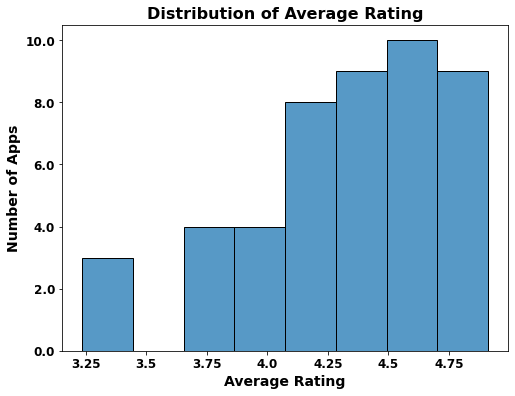

In [184]:
## Plot distribution of average scores
plt.figure(figsize=(8,6))
g = sns.histplot(data=google_play_info_df, x='score')
g.set_title('Distribution of Average Rating',
            fontdict = {'weight': 'bold', 'size':16})
g.set_xlabel('Average Rating',
            fontdict = {'weight': 'bold', 'size':14})
g.set_xticklabels(g.get_xticks(),
                  fontdict = {'weight': 'bold', 'size':12})
g.set_ylabel('Number of Apps',
            fontdict = {'weight': 'bold', 'size':14})
g.set_yticklabels(g.get_yticks(),
                  fontdict = {'weight': 'bold', 'size':12});

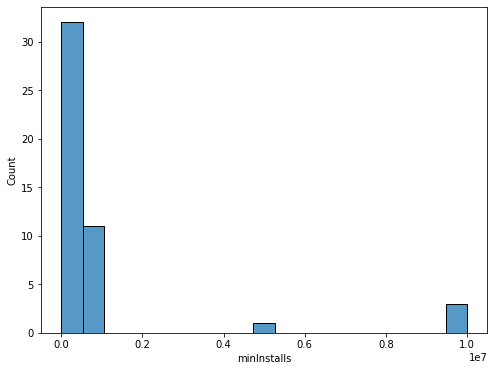

In [155]:
## Plot distribution of installs
plt.figure(figsize=(8,6))
g = sns.histplot(data=google_play_info_df, x='minInstalls');

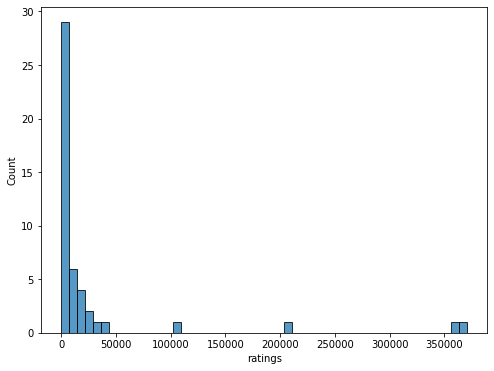

In [129]:
## Plot distribution of ratings
plt.figure(figsize=(8,6))
g = sns.histplot(data=google_play_info_df, x='ratings');

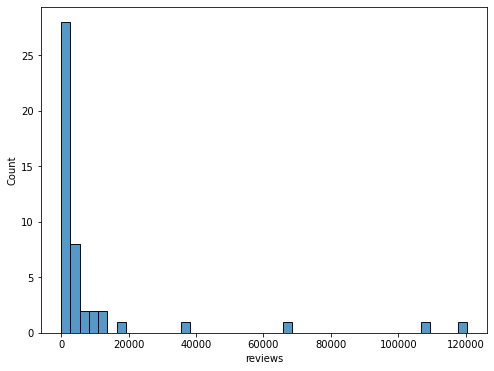

In [130]:
## Plot distribution of reviews
plt.figure(figsize=(8,6))
g = sns.histplot(data=google_play_info_df, x='reviews');

## Scrape Reviews for Each App
### Scrape Reviews from App Store

In [97]:
app_store_names = list(app_df['iOS_app_name'])

In [59]:
## Set up new collection within project db
app_store_rvws = mha_proj_db['app_store_rvws']

In [63]:
test_collection = mha_proj_db['test_collection']

In [74]:
first_2_info = [('aloe-bud', 1318382054),
                ('aura-meditation-sleep', 1114223104)]

In [90]:
start = dt.datetime.now(tz=get_localzone())
fmt= "%m/%d/%y - %T %p"

print('---'*20)    
print(f'***** aloe-bud started at {start.strftime(fmt)}')
print()

app_ = AppStore(country='us', app_name='aloe-bud', app_id=1052216403)

# grab reviews
app_.review(sleep=random.randint(60,90))

reviews = app_.reviews

# add keys to store information about which app each review is for
for rvw in reviews:
    rvw['app_name'] = 'aloe-bud'
    rvw['app_id'] = 1052216403


print(f'Done scraping aloe-bud. Scraped a total of {app_.reviews_count} reviews.\n')

# insert reviews into collection
test_collection.insert_many(reviews)

end = dt.datetime.now(tz=get_localzone())

print(f'Successfully inserted aloe-bud reviews into collection at {end.strftime(fmt)}.\n')
print(f'Time elapsed for aloe-bud: {end-start}')
print('---'*20)

------------------------------------------------------------
***** moodpath-depression-anxiety started at 03/15/21 - 18:04:15 PM



2021-03-15 18:04:17,563 [INFO] Base - Initialised: AppStore('us', 'moodpath-depression-anxiety', 1052216403)
2021-03-15 18:04:17,564 [INFO] Base - Ready to fetch reviews from: https://apps.apple.com/us/app/moodpath-depression-anxiety/id1052216403
2021-03-15 18:08:47,882 [INFO] Base - [id:1052216403] Fetched 20 reviews (20 fetched in total)
2021-03-15 18:15:42,142 [ERROR] Base - Keyboard interrupted
2021-03-15 18:15:42,143 [INFO] Base - [id:1052216403] Fetched 60 reviews (60 fetched in total)


Done scraping moodpath-depression-anxiety. Scraped a total of 60 reviews.

Successfully inserted moodpath-depression-anxiety reviews into collection at 03/15/21 - 18:15:42 PM.

Time elapsed for moodpath-depression-anxiety: 0:11:26.198710
------------------------------------------------------------


In [102]:
## Set up loop to go through each app in the App Store
for app_name, app_id in first_2_info:
    
    start = dt.datetime.now(tz=get_localzone())
    fmt= "%m/%d/%y - %T %p"
    
    print('---'*20)    
    print(f'***** {app_name} started at {start.strftime(fmt)}')
    print()
    
    app_ = AppStore(country='us', app_name=app_name, app_id=app_id)
    
    # grab reviews posted since February 28, 2020 and limit to 10,000 reviews
    app_.review(how_many=10000,
                after=dt.datetime(2020, 2, 28),
                sleep=random.randint(120,240))
    
    reviews = app_.reviews
    
    # add keys to store information about which app each review is for
    for rvw in reviews:
        rvw['app_name'] = app_name
        rvw['app_id'] = app_id
    
    
    print(f'Done scraping {app_name}. Scraped a total of {app_.reviews_count} reviews.\n')
    
    # insert reviews into collection
    test_collection.insert_many(reviews)
    
    end = dt.datetime.now(tz=get_localzone())
    
    print(f'Successfully inserted {app_name} reviews into collection at {end.strftime(fmt)}.\n')
    print(f'Time elapsed for {app_name}: {end-start}')
    print('---'*20)
    print('\n')
    
    time.sleep(90)

------------------------------------------------------------
***** aloe-bud started at 03/16/21 - 10:53:36 AM



2021-03-16 10:53:37,627 [INFO] Base - Initialised: AppStore('us', 'aloe-bud', 1318382054)
2021-03-16 10:53:37,630 [INFO] Base - Ready to fetch reviews from: https://apps.apple.com/us/app/aloe-bud/id1318382054
2021-03-16 10:56:34,804 [INFO] Base - [id:1318382054] Fetched 20 reviews (20 fetched in total)
2021-03-16 11:02:29,335 [INFO] Base - [id:1318382054] Fetched 60 reviews (60 fetched in total)
2021-03-16 11:08:23,852 [INFO] Base - [id:1318382054] Fetched 66 reviews (66 fetched in total)
2021-03-16 11:14:18,296 [INFO] Base - [id:1318382054] Fetched 68 reviews (68 fetched in total)
2021-03-16 11:20:13,110 [INFO] Base - [id:1318382054] Fetched 69 reviews (69 fetched in total)
2021-03-16 11:23:10,594 [INFO] Base - [id:1318382054] Fetched 73 reviews (73 fetched in total)


Done scraping aloe-bud. Scraped a total of 73 reviews.

Successfully inserted aloe-bud reviews into collection at 03/16/21 - 11:23:10 AM.

Time elapsed for aloe-bud: 0:29:34.627027
------------------------------------------------------------


------------------------------------------------------------
***** aura-meditation-sleep started at 03/16/21 - 11:24:40 AM



2021-03-16 11:24:41,729 [INFO] Base - Initialised: AppStore('us', 'aura-meditation-sleep', 1114223104)
2021-03-16 11:24:41,730 [INFO] Base - Ready to fetch reviews from: https://apps.apple.com/us/app/aura-meditation-sleep/id1114223104
2021-03-16 11:26:49,935 [INFO] Base - [id:1114223104] Fetched 5 reviews (5 fetched in total)
2021-03-16 11:31:06,444 [INFO] Base - [id:1114223104] Fetched 18 reviews (18 fetched in total)
2021-03-16 11:35:22,837 [INFO] Base - [id:1114223104] Fetched 30 reviews (30 fetched in total)
2021-03-16 11:39:39,255 [INFO] Base - [id:1114223104] Fetched 40 reviews (40 fetched in total)
2021-03-16 11:43:55,737 [INFO] Base - [id:1114223104] Fetched 46 reviews (46 fetched in total)
2021-03-16 11:48:12,137 [INFO] Base - [id:1114223104] Fetched 51 reviews (51 fetched in total)
2021-03-16 11:52:28,546 [INFO] Base - [id:1114223104] Fetched 66 reviews (66 fetched in total)
2021-03-16 11:56:45,079 [INFO] Base - [id:1114223104] Fetched 77 reviews (77 fetched in total)
2021-03

2021-03-16 17:21:40,141 [INFO] Base - [id:1114223104] Fetched 718 reviews (718 fetched in total)
2021-03-16 17:25:56,631 [INFO] Base - [id:1114223104] Fetched 724 reviews (724 fetched in total)
2021-03-16 17:30:13,045 [INFO] Base - [id:1114223104] Fetched 729 reviews (729 fetched in total)
2021-03-16 17:34:29,475 [INFO] Base - [id:1114223104] Fetched 741 reviews (741 fetched in total)
2021-03-16 17:38:46,028 [INFO] Base - [id:1114223104] Fetched 752 reviews (752 fetched in total)
2021-03-16 17:43:02,951 [INFO] Base - [id:1114223104] Fetched 755 reviews (755 fetched in total)
2021-03-16 17:47:19,452 [INFO] Base - [id:1114223104] Fetched 768 reviews (768 fetched in total)
2021-03-16 17:51:36,002 [INFO] Base - [id:1114223104] Fetched 772 reviews (772 fetched in total)
2021-03-16 17:55:52,547 [INFO] Base - [id:1114223104] Fetched 780 reviews (780 fetched in total)
2021-03-16 18:00:09,194 [INFO] Base - [id:1114223104] Fetched 783 reviews (783 fetched in total)
2021-03-16 18:04:25,749 [INFO]

Done scraping aura-meditation-sleep. Scraped a total of 1123 reviews.

Successfully inserted aura-meditation-sleep reviews into collection at 03/16/21 - 22:50:56 PM.

Time elapsed for aura-meditation-sleep: 11:26:15.466908
------------------------------------------------------------




In [118]:
test_df = pd.DataFrame(list(test_collection.find({})))
test_df

,_id,rating,userName,date,review,title,isEdited,app_name,app_id,developerResponse
0,604fad1bbd1e5fa3b28306ab,5,knsky8,2020-10-09 12:19:21,I really am enjoying this app and once I start...,Simple gentle ways to a better you,False,aloe-bud,1318382054,NaN
1,604fad1bbd1e5fa3b28306ac,5,Candycrushgirl60,2021-03-01 03:51:42,I have tried a lot of apps that said they woul...,This app changed my life!,False,aloe-bud,1318382054,NaN
2,604fad1bbd1e5fa3b28306ad,5,hhhhhjghjhhnjgh,2021-03-13 01:16:42,IT JUST CAN'T GET MUCH BETTER! it really helps...,Love this app! - MOST READ,False,aloe-bud,1318382054,NaN
3,604fad1bbd1e5fa3b28306ae,5,ekg2005,2020-06-29 12:20:49,"I don’t usually write reviews for apps, but I ...","Such a cute, helpful app!",False,aloe-bud,1318382054,NaN
4,604fad1bbd1e5fa3b28306af,5,Shoshana Lipson,2020-06-26 21:38:49,Where to begin before I started using aloe bud...,So Amazing!!,False,aloe-bud,1318382054,NaN
...,...,...,...,...,...,...,...,...,...,...
2231,60516e90bd1e5fa3b2830f62,1,ktinlo,2020-05-12 15:32:38,I decided to except the seven day free trial a...,Don’t sign up for a trial,False,aura-meditation-sleep,1114223104,"{'id': 15278671, 'body': 'Hi! Thanks for your ..."
2232,60516e90bd1e5fa3b2830f63,5,C12345!,2020-04-15 15:04:02,Great app!,C12345!,False,aura-meditation-sleep,1114223104,NaN
2233,60516e90bd1e5fa3b2830f64,5,Nikki40416,2020-04-15 14:53:20,It’s a very nice app. It helps me so much. If ...,So peaceful,False,aura-meditation-sleep,1114223104,NaN
2234,60516e90bd1e5fa3b2830f65,5,camiejacks,2020-04-08 04:25:30,Thanks!,Thanks!,False,aura-meditation-sleep,1114223104,NaN


In [119]:
## Drop duplicate reviews
test_df = test_df.drop(columns=['_id'])
test_df = test_df.drop_duplicates(['rating', 'userName', 'date', 'review', 'title', 'app_name'])
print(len(test_df))

1249


In [117]:
# test_df = test_df.drop_duplicates(['review', 'title', 'app_name'])
# print(len(test_df))

1248


In [ ]:
## Set up loop to go through each app in the App Store
for app_name, app_id in first_2_info:
    
    start = dt.datetime.now(tz=get_localzone())
    fmt= "%m/%d/%y - %T %p"
    
    print('---'*20)    
    print(f'***** {app_name} started at {start.strftime(fmt)}')
    print()
    
    app_ = AppStore(country='us', app_name=app_name, app_id=app_id)
    
    # grab reviews posted since February 28, 2020 and limit to 10,000 reviews
    app_.review(how_many=10000,
                after=dt.datetime(2020, 2, 28),
                sleep=random.randint(120,240))
    
    reviews = app_.reviews
    
    # add keys to store information about which app each review is for
    for rvw in reviews:
        rvw['app_name'] = app_name
        rvw['app_id'] = app_id
    
    
    print(f'Done scraping {app_name}. Scraped a total of {app_.reviews_count} reviews.\n')
    
    # insert reviews into collection
    test_collection.insert_many(reviews)
    
    end = dt.datetime.now(tz=get_localzone())
    
    print(f'Successfully inserted {app_name} reviews into collection at {end.strftime(fmt)}.\n')
    print(f'Time elapsed for {app_name}: {end-start}')
    print('---'*20)
    print('\n')
    
    time.sleep(90)

In [186]:
client.close()